In [3]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

car_data = pd.read_csv('carData.csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
#statistics of the numerical features
numerical_stats = car_data.describe()
numerical_stats

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
# Check the number of classes in each categorical column
categorical_columns = car_data.select_dtypes(include=['object']).columns
categorical_classes = {column: car_data[column].nunique() for column in categorical_columns}
categorical_classes

{'Car_Name': 98, 'Fuel_Type': 3, 'Seller_Type': 2, 'Transmission': 2}

In [7]:
# Identify the type of data in each column (numerical or categorical)
data_types = car_data.dtypes
data_types

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

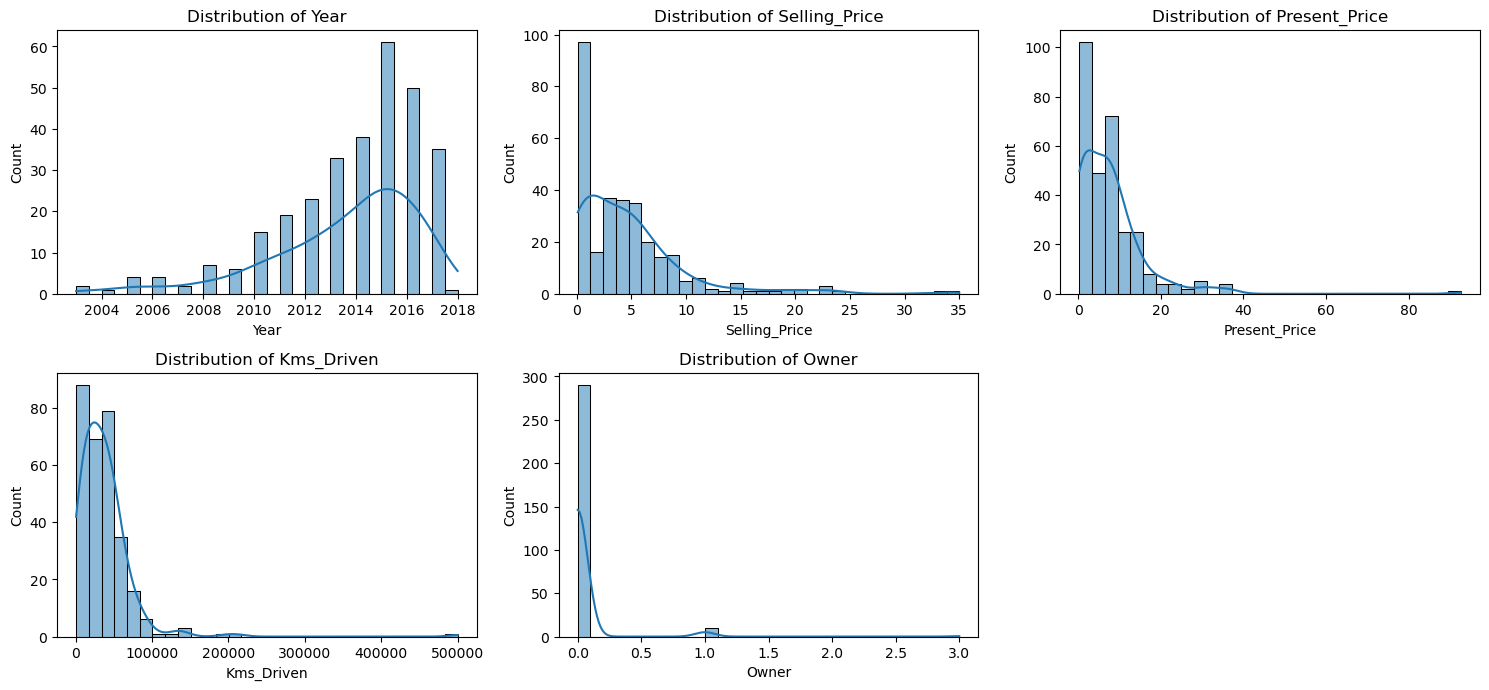

In [10]:
# For numerical features, we'll create histograms
# For categorical features, we'll create bar plots

plt.figure(figsize=(15, 10))

# Plot histograms for all numerical features
for index, column in enumerate(car_data.select_dtypes(include=['int64', 'float64']).columns):
    plt.subplot(3, 3, index+1)
    sns.histplot(car_data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()

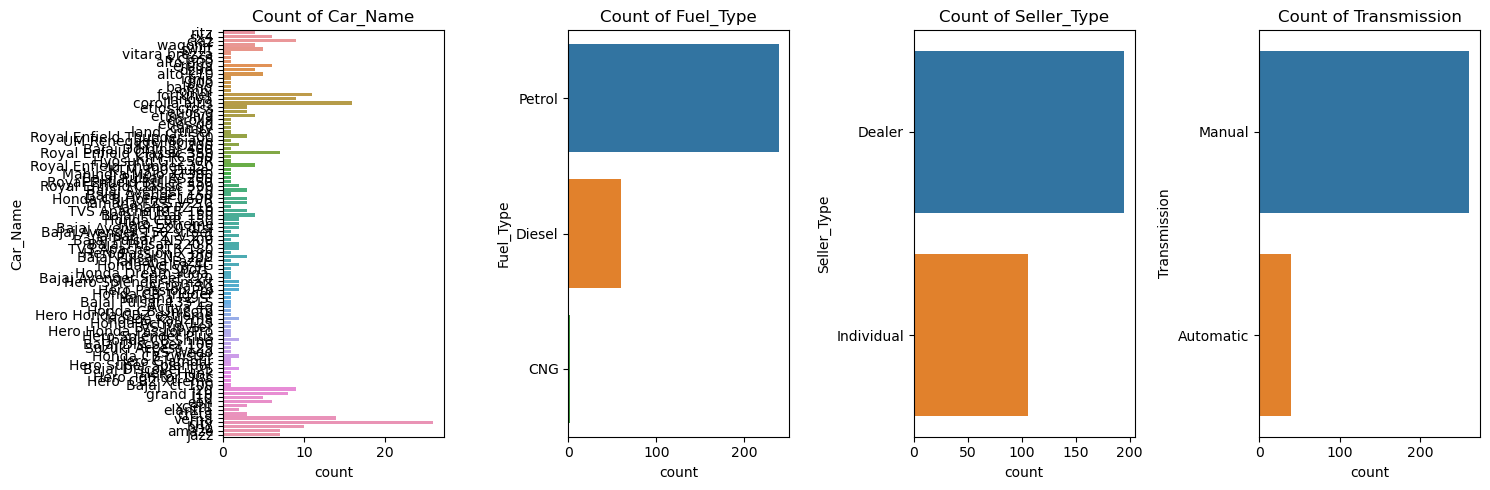

In [11]:
# Visualizing categorical data with count plots
plt.figure(figsize=(15, 5))
for index, column in enumerate(categorical_columns):
    plt.subplot(1, len(categorical_columns), index+1)
    sns.countplot(y=car_data[column])
    plt.title(f'Count of {column}')
plt.tight_layout()

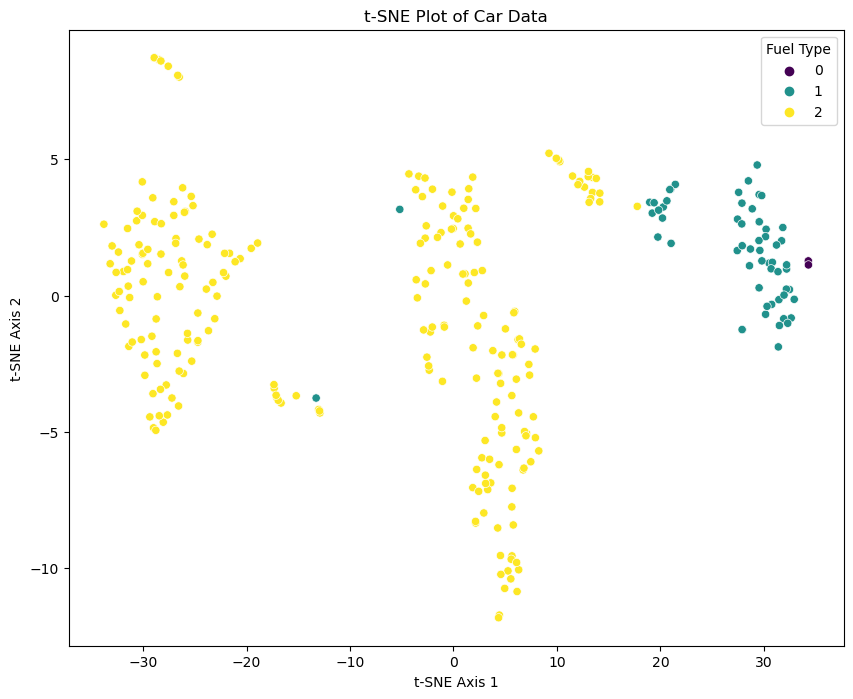

(              Year  Selling_Price  Present_Price     Kms_Driven       Owner
 count   301.000000     301.000000     301.000000     301.000000  301.000000
 mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
 std       2.891554       5.082812       8.644115   38886.883882    0.247915
 min    2003.000000       0.100000       0.320000     500.000000    0.000000
 25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
 50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
 75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
 max    2018.000000      35.000000      92.600000  500000.000000    3.000000,
 {'Car_Name': 98, 'Fuel_Type': 3, 'Seller_Type': 2, 'Transmission': 2},
 Car_Name          object
 Year               int64
 Selling_Price    float64
 Present_Price    float64
 Kms_Driven         int64
 Fuel_Type         object
 Seller_Type       object
 Transmission      object
 Owner              int64


In [19]:
# For t-SNE visualization, we first need to encode categorical variables and scale the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encoding categorical variables
for col in categorical_columns:
    le = LabelEncoder()
    car_data[col] = le.fit_transform(car_data[col])

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(car_data.select_dtypes(include=['int64', 'float64']))

# Using t-SNE to reduce data to two dimensions
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=car_data['Fuel_Type'], palette='viridis')
plt.title('t-SNE Plot of Car Data')
plt.xlabel('t-SNE Axis 1')
plt.ylabel('t-SNE Axis 2')
plt.legend(title='Fuel Type')
plt.show()

# Returning the results
numerical_stats, categorical_classes, data_types

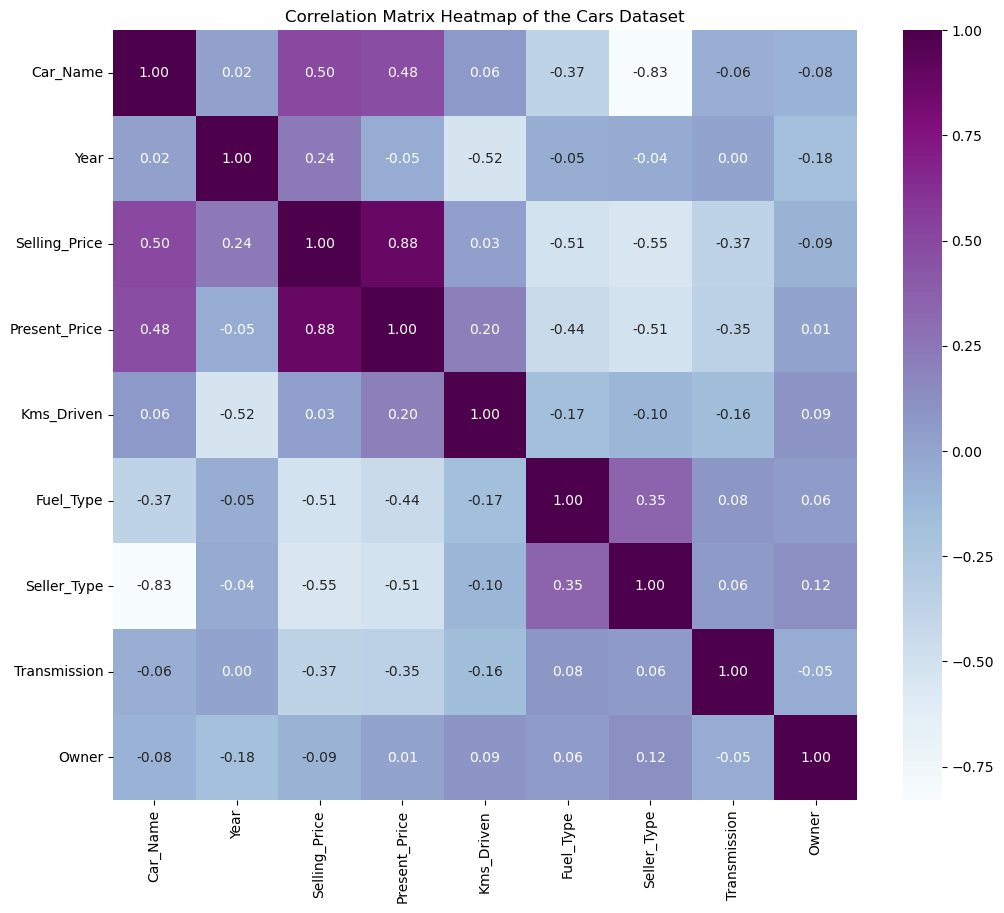

In [17]:
# Correlation Matrix Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(car_data.corr(), annot=True, cmap='BuPu', fmt='.2f')
plt.title('Correlation Matrix Heatmap of the Cars Dataset')
plt.show()